         Price  Living.Area       Age  Fireplaces  Bathrooms
0     0.215073     0.287533  0.538462        0.00   0.000000
1     0.202468     0.220369  0.056680        0.25   0.142857
2     0.173544     0.224320  0.060729        0.25   0.285714
3     0.208356     0.247586  0.198381        0.50   0.000000
4     0.193212     0.310799  0.117409        0.25   0.000000
...        ...          ...       ...         ...        ...
1052  0.155852     0.248025  0.226721        0.25   0.285714
1053  0.377253     0.563433  0.004049        0.50   0.714286
1054  0.236721     0.168569  0.267206        0.25   0.285714
1055  0.279036     0.298068  0.012146        0.25   0.428571
1056  0.295534     0.312774  0.040486        0.25   0.428571

[1057 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method

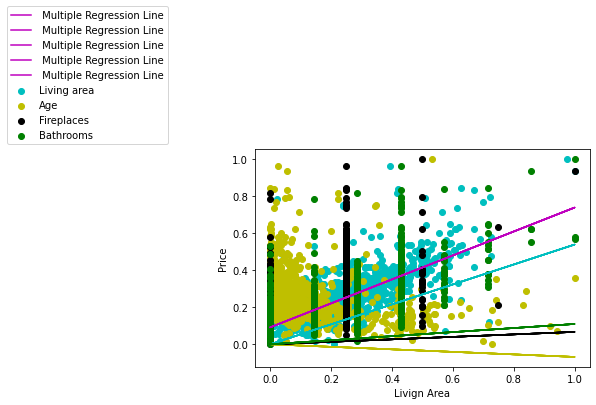

In [42]:
import pandas as pd
import researchpy as py
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

#####KEEP CATEGORY OF INTEREST IN POS 0

cat = ['Price','Living.Area','Age','Fireplaces','Bathrooms']

def readcsv(name, cat_Type, *categories):
    df = pd.read_csv(name)


    df = df.replace(r'^\s*$', np.nan, regex=True)

#     for category in categories:
#         df[category] = df[category].astype(cat_Type)
        
    return df

df =readcsv('HousingPrices.csv',float,cat)
# df.loc[df['Type']=='Sedan',['Type']] =1
# df.loc[df['Type']=='SUV',['Type']] = 2
# df.loc[df['Type']=='Minivan',['Type']] = 3
# df.loc[df['Type']=='Wagon',['Type']] = 4
# df['Type'] = df['Type'].astype('int64')
new_df = df[[cat[0],cat[1],cat[2],cat[3],cat[4],]]
df['Lot.Size'] = df['Lot.Size'].astype('float')
new_df = new_df.dropna()
new_df = (((new_df-new_df.min()))/(new_df.max()-new_df.min()))*1
# new_df[[cat[1],cat[2],cat[3]]]
# new_df = new_df.drop([21])
# new_df = new_df.drop([14])
# new_df = new_df.reset_index()
# new_df = new_df.drop(['index'],axis=1)
print(new_df)
y = np.array(new_df[cat[0]])
x1 = np.array(new_df[cat[1]])
x2 = np.array(new_df[cat[2]])
x3 = np.array(new_df[cat[3]])
x4 = np.array(new_df[cat[4]])
# x5 = np.array(new_df[cat[5]])
X = np.array(new_df[cat[1:5]])

# model = LinearRegression().fit(x,y)
# r_sq = model.score(x,y)
# print(r_sq)
x = sm.add_constant(X)

models = sm.OLS(y,x)
results = models.fit()
print(results.summary())
print(results.rsquared)
print(results.rsquared_adj)
print(results.params)

y_res = results.resid

pred_x = results.fittedvalues
pred_y = results.predict(x)

p=results.params
# x=np.arange(0,100)


fig,ax = plt.subplots()
ax.plot(x,(p[0]+p[1]*x+p[2]*x+p[3]*x+p[4]*x), color = 'm',label = ' Multiple Regression Line')
# ax.plot(x,p[0],color ='#03fc6b', label = 'Regression const')
ax.plot(x,p[1]*x,color= 'c')
ax.plot(x,p[2]*x,color= 'y')
ax.plot(x,p[3]*x,color ='k')
ax.plot(x,p[4]*x,color ='g')
# ax.plot(x,p[5]*x,color ='r')
# ax.set_size_inches(20, 15)
# ax.set_autoscale_on
# ax.set_xlim(40)
ax.scatter(x1,y, color = 'c', label = 'Living area')
ax.scatter(x2,y, color = 'y', label = 'Age')
ax.scatter(x3,y, color = 'k', label = 'Fireplaces')
ax.scatter(x4,y, color = 'g', label = 'Bathrooms')
# ax.scatter(x5,y, color = 'r', label = 'Fireplaces')
plt.ylabel('Price')
plt.xlabel('Livign Area')
# ax.axis('equal')
leg = ax.legend(loc='lower center',bbox_to_anchor=(-0.5,1));

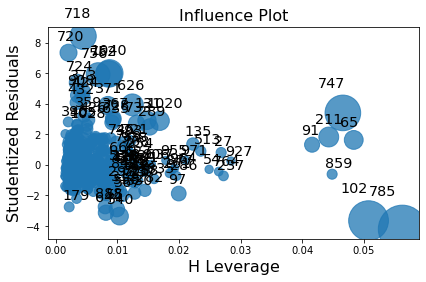

In [41]:
fig = sm.graphics.influence_plot(results,alpha = 0.01)
fig.figsize()
plt.show()

1057
1057
LeveneResult(statistic=14.35650765003725, pvalue=2.639850965996611e-09)


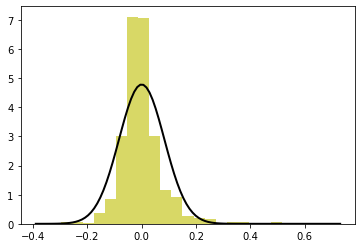

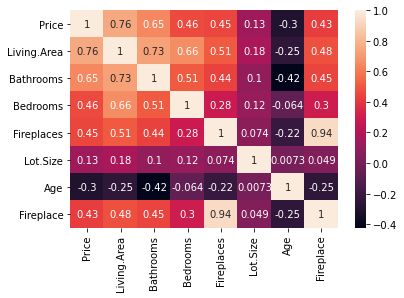

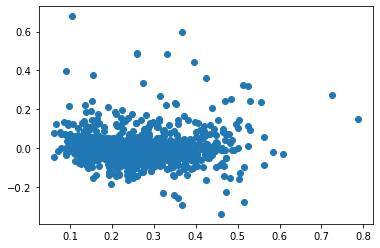

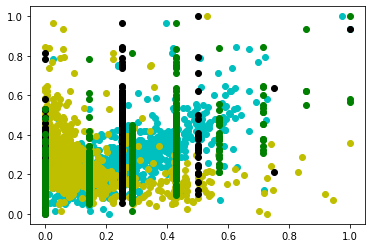

In [43]:
import statsmodels.formula.api as smf
print(len(x))
print(len(y))
# plt.scatter(pred_x,y_res)
# plt.show()
print(stats.levene(y,x1,x2,x3))

mu,std = stats.norm.fit(y_res)

plt.hist(y_res, bins=25, density = True, alpha=0.6, color = 'y')
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = stats.norm.pdf(x,mu,std)
plt.plot(x,p,'k',linewidth = 2)
plt.show()

# plt.scatter(x1,y,x2,linewidths = 12,alhpa )
plt.show() 

corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

plt.scatter(pred_y,y_res)
plt.show()

# sns.lmplot(x='CommunitySupport',y='LifeSatisfaction',hue = 'Community Support')
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1,y,color = 'c')
ax1.scatter(x2,y,color = 'y')
ax1.scatter(x3,y, color = 'k')
ax1.scatter(x4,y,color='g')
plt.show()



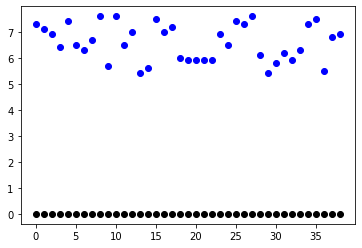

In [56]:
X = new_df[[cat[1],cat[2],cat[3]]]
y = new_df[cat[0]]

theta = np.array([0]*len(X.columns))
m = len(new_df)

def hypothesis(theta, X):
    return theta*X

# for i in range(1, len(X.columns)):
#     X.loc[i-1] = X.loc[i-1]/np.max(X.loc[i-1])
# X.head()

def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*len(new_df))

def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

J, j, theta = gradientDescent(X, y, theta, 1, 1000)

y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

plt.figure()
plt.scatter(x=list(range(0, len(X))),y= y, color='blue')         
plt.scatter(x=list(range(0, len(X))), y=y_hat, color='black')
plt.show()

In [64]:

y1 = hypothesis(theta, X)
y1 = np.sum(y1, axis=1)
.05*(sum((y1-y)*X.iloc[:,2])/len(X))



-29.774102564102567